In [36]:
import torch
import torch.nn as nn

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [38]:
os.getcwd()

'c:\\Users\\ADMIN\\Documents\\GitHub\\Ana'

In [39]:
df = pd.read_csv('data\\cleaned_data.csv')
df.head()

,radius1,perimeter1,area1,compactness1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,perimeter3,area3,compactness3,concavity3,concave_points3,Diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1


In [40]:
df.describe()

,radius1,perimeter1,area1,compactness1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,perimeter3,area3,compactness3,concavity3,concave_points3,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.104341,0.088799,0.048919,0.405172,2.866059,40.337079,16.269190,107.261213,880.583128,0.254265,0.272188,0.114606,0.372583
std,3.524049,24.298981,351.914129,0.052813,0.079720,0.038803,0.277313,2.021855,45.491006,4.833242,33.602542,569.356993,0.157336,0.208624,0.065732,0.483918
min,6.981000,43.790000,143.500000,0.019380,0.000000,0.000000,0.111500,0.757000,6.802000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000,0.000000
25%,11.700000,75.170000,420.300000,0.064920,0.029560,0.020310,0.232400,1.606000,17.850000,13.010000,84.110000,515.300000,0.147200,0.114500,0.064930,0.000000
50%,13.370000,86.240000,551.100000,0.092630,0.061540,0.033500,0.324200,2.287000,24.530000,14.970000,97.660000,686.500000,0.211900,0.226700,0.099930,0.000000
75%,15.780000,104.100000,782.700000,0.130400,0.130700,0.074000,0.478900,3.357000,45.190000,18.790000,125.400000,1084.000000,0.339100,0.382900,0.161400,1.000000
max,28.110000,188.500000,2501.000000,0.345400,0.426800,0.201200,2.873000,21.980000,542.200000,36.040000,251.200000,4254.000000,1.058000,1.252000,0.291000,1.000000


In [41]:
y = np.array(df.loc[:,'Diagnosis'])
X = np.array(df.drop(['Diagnosis'],axis=1))


In [42]:
y = y.reshape(-1,1)
y.shape


(569, 1)

In [43]:
X.shape

(569, 15)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=71)

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X)


StandardScaler()

In [48]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
type(X_test)

numpy.ndarray

In [49]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [50]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [51]:
class LogisticRegression(nn.Module):
    def __init__(self, n):
        super(LogisticRegression, self).__init__()
        self.input_layer = nn.Linear(n,1)
        self.sig = nn.Sigmoid()
    def forward(self, x):
        out = self.input_layer(x)
        act_out = self.sig(out)
        return act_out
    

In [52]:
model = LogisticRegression(15)

In [59]:
loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [60]:
epochs = 50000
test_loss = []
train_loss = []
for epoch in range(epochs):
    output = model(X_train)
    loss = loss_fun(output.squeeze(), y_train)
    train_loss.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        output = model(X_test)
        loss = loss_fun(output.squeeze(), y_test)
        test_loss.append(loss.detach().numpy())

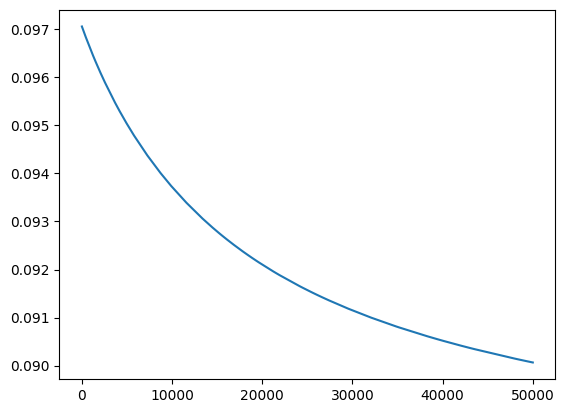

In [61]:
l = [i.detach() for i in train_loss]
train_loss = np.array(l)
plt.plot(train_loss)

In [68]:
cor = 0
for i in range(len(X_test)):
    y_hat = 0 if model(X_test[i])<0.5 else 1
    if int(y_test[i])== y_hat:
        cor+=1
print('Accuracy :',cor/len(X_test))

Accuracy : 0.9649122807017544


In [78]:
os.getcwd()

'c:\\Users\\ADMIN\\Documents\\GitHub\\Ana\\data'

In [79]:
torch.save(model.state_dict(), 'model.pth')

In [80]:
import pickle
with open('scaler.pkl','wb') as s:
    pickle.dump(scaler, s)

In [76]:
X_test[0]

tensor([-0.6212, -0.5807, -0.6083, -0.0614, -0.2895, -0.2840, -0.4727,  0.1643,
        -0.4054, -0.6273, -0.4486, -0.5880,  0.1720, -0.1712,  0.0136])

In [77]:
model(X_test[0])

tensor([0.0208], grad_fn=<SigmoidBackward0>)